In [20]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2

In [29]:
overlay = Overlay("design_1.bit")
dma = overlay.axi_dma_0
sobel_ip = overlay.ADDER_0

In [10]:
![](hailee.jpg)

/bin/bash: -c: line 1: syntax error near unexpected token `hailee.jpg'
/bin/bash: -c: line 1: `[](hailee.jpg)'


# Image Display

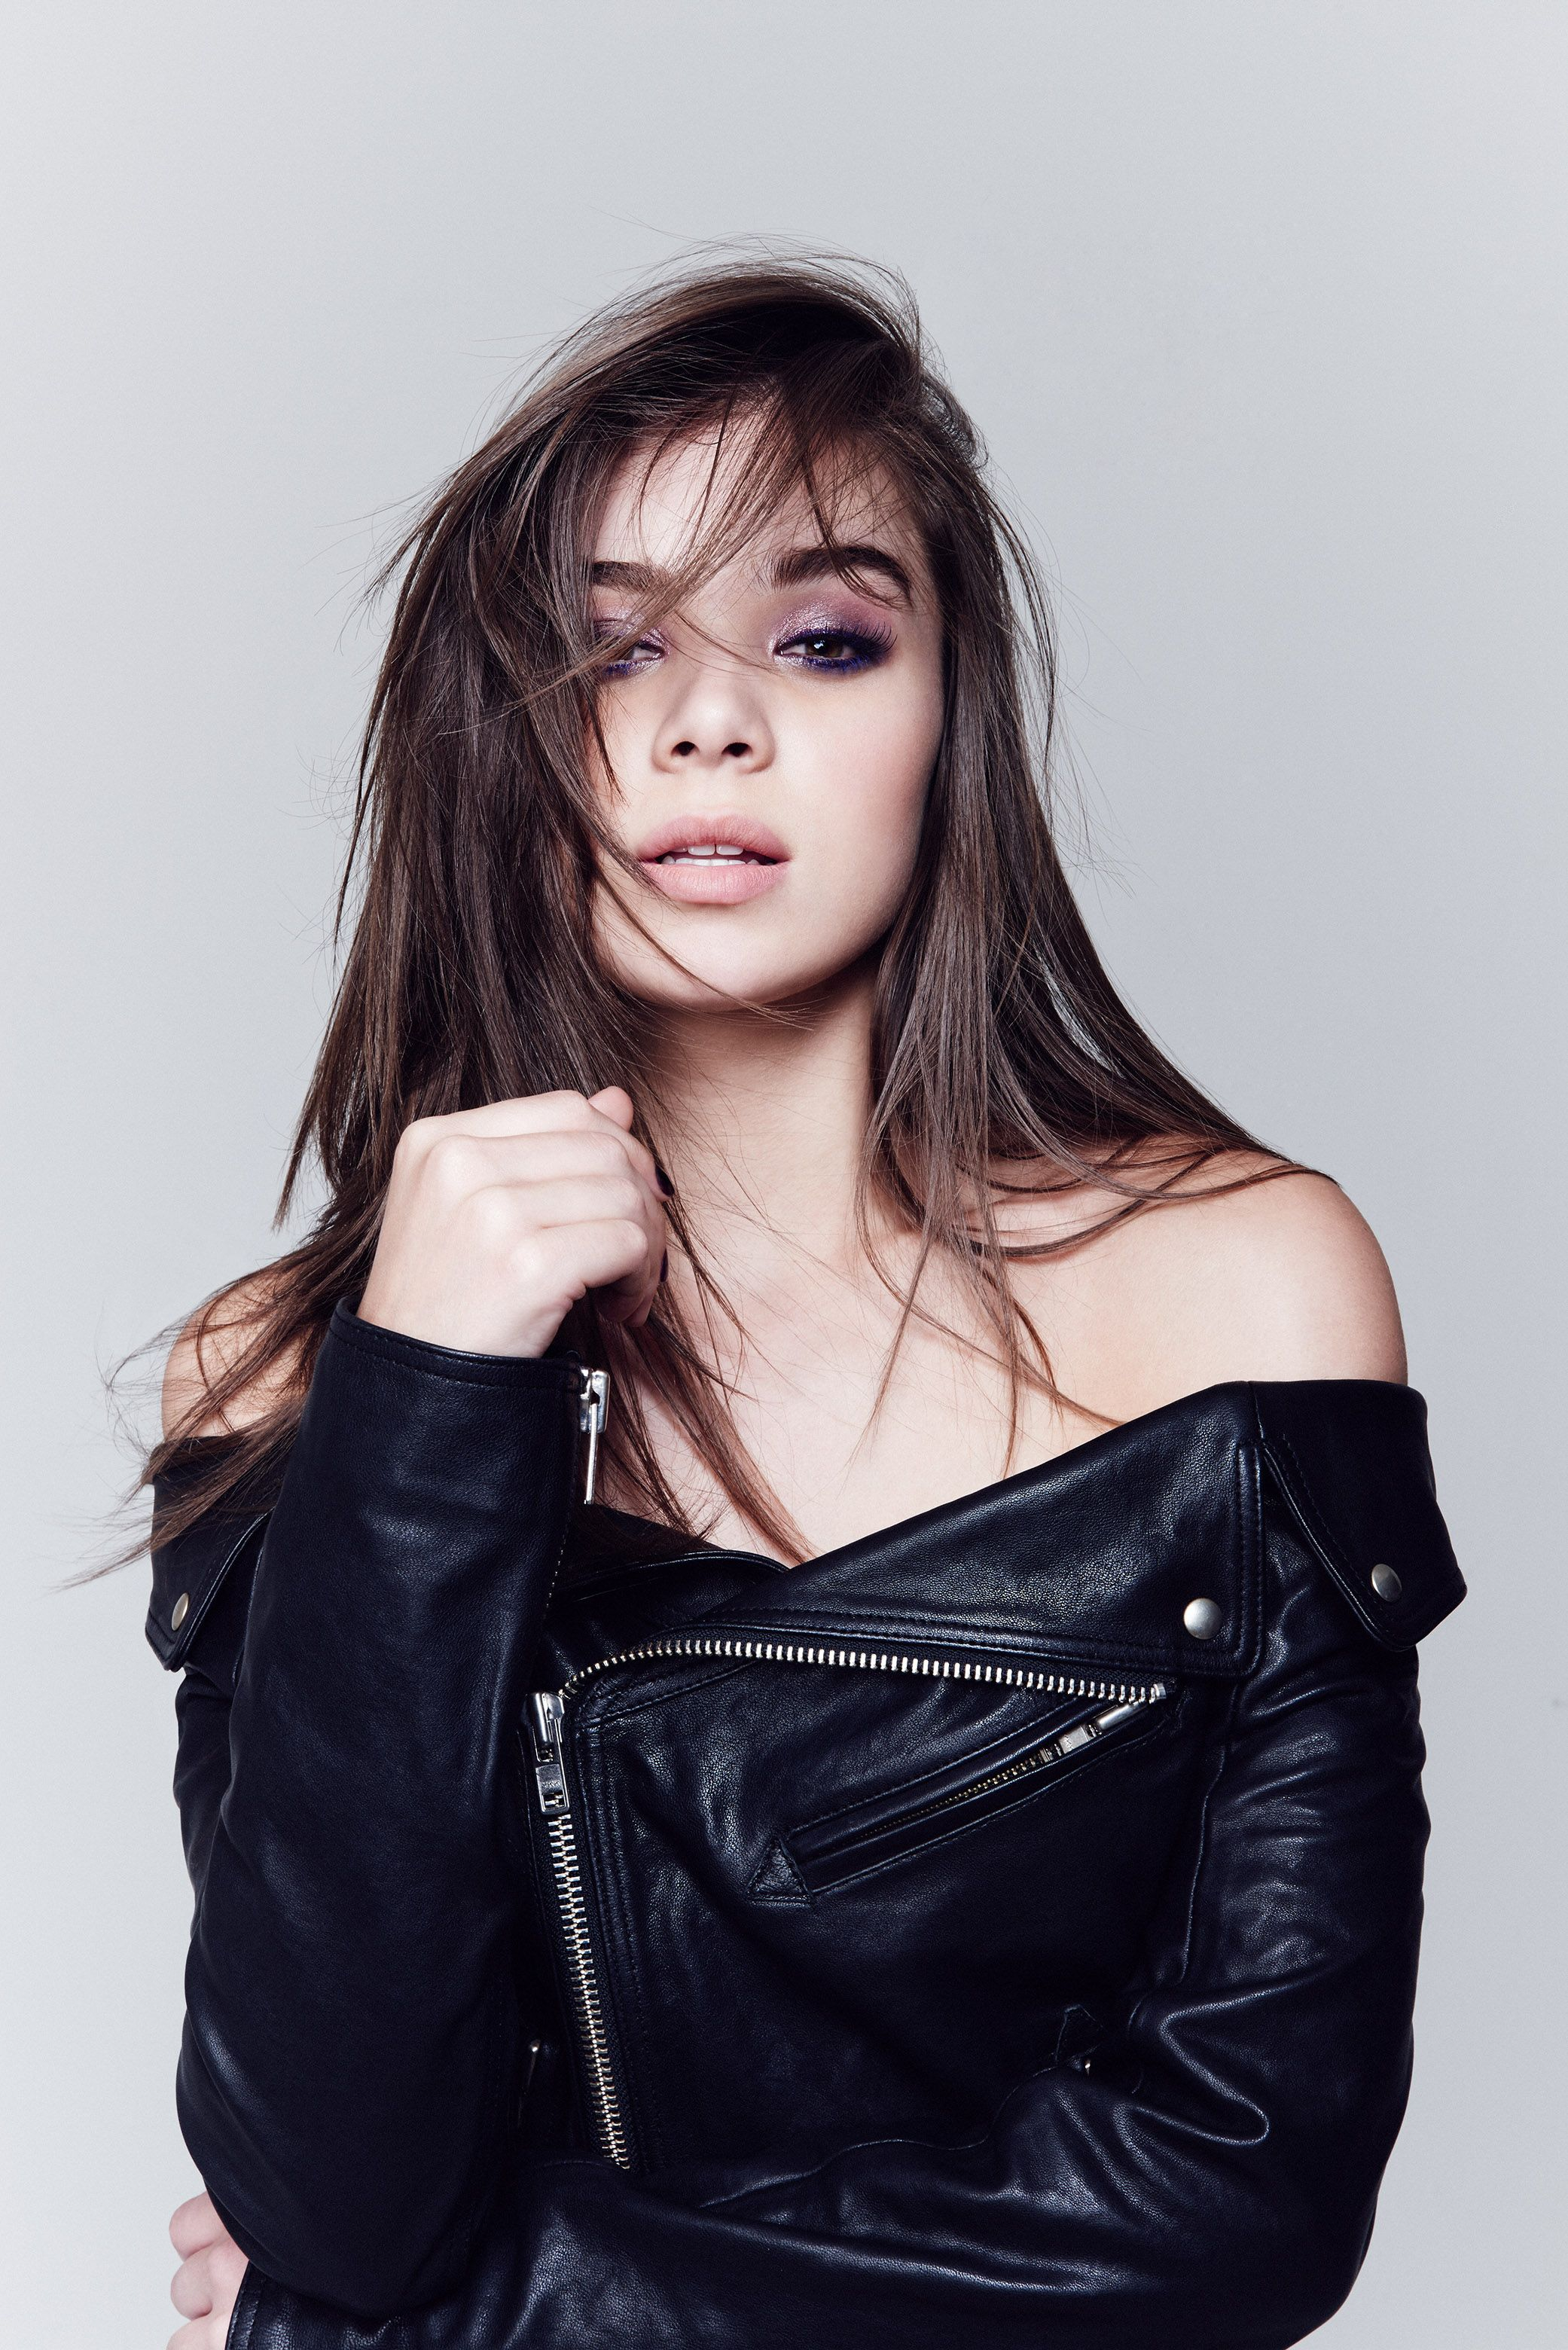

In [1]:
from IPython.display import Image, display

# Replace with the correct path to your image
display(Image(filename='hailee.jpg', width=480, height=640))


# Resize and save image

In [2]:
from PIL import Image
img = Image.open('hailee.jpg')
resized_img = img.resize((2048, 3072)) # widht height
resized_img.save('hailee_resized3.jpg')

In [5]:
import cv2

In [6]:
# Reading image
image_path = "hailee_resized.jpg"  # Path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
height, width = image.shape
print(f"Image Height: {height}, Width: {width}")

Image Height: 3120, Width: 2048


# Image filter

In [ ]:
image_path = 'hailee.jpg'

In [24]:
image = cv2.imread(image_path)

In [25]:
image

array([[[229, 225, 224],
        [229, 225, 224],
        [229, 225, 224],
        ...,
        [223, 219, 218],
        [223, 219, 218],
        [223, 219, 218]],

       [[229, 225, 224],
        [229, 225, 224],
        [229, 225, 224],
        ...,
        [223, 219, 218],
        [223, 219, 218],
        [223, 219, 218]],

       [[229, 225, 224],
        [229, 225, 224],
        [229, 225, 224],
        ...,
        [223, 219, 218],
        [223, 219, 218],
        [223, 219, 218]],

       ...,

       [[234, 229, 228],
        [234, 229, 228],
        [234, 229, 228],
        ...,
        [215, 210, 207],
        [215, 210, 207],
        [215, 210, 207]],

       [[234, 229, 228],
        [234, 229, 228],
        [234, 229, 228],
        ...,
        [215, 210, 207],
        [215, 210, 207],
        [215, 210, 207]],

       [[234, 229, 228],
        [234, 229, 228],
        [234, 229, 228],
        ...,
        [215, 210, 207],
        [215, 210, 207],
        [215, 210, 207]]

In [26]:
height, width, channel = image.shape

In [27]:
print(height, width, channel)

480 640 3


In [30]:
input_buffer = allocate(shape=(height, width, 4), dtype=np.int32)
output_buffer = allocate(shape=(height, width, 4), dtype=np.int32)

In [31]:
input_buffer[:] = np.random.randint(0, 266, (height, width, 4), dtype=np.int32)

In [32]:
input_buffer

PynqBuffer([[[246, 137, 116, 233],
             [205, 210,  42,  46],
             [  4, 185,  71,   9],
             ...,
             [172, 224,  21, 143],
             [249, 249,  32, 215],
             [245, 181, 167,   6]],

            [[  2,  38, 128,  63],
             [193,  69,  83, 243],
             [224, 224, 214, 223],
             ...,
             [198,  64, 238,  48],
             [191,  35, 200, 204],
             [170, 227,   8, 229]],

            [[140, 119, 117, 225],
             [128,   3, 222, 152],
             [105, 206,  63,  62],
             ...,
             [ 32, 232, 147, 242],
             [201, 124,  15,   9],
             [164, 220,   9, 248]],

            ...,

            [[164,  69, 108, 100],
             [121, 234, 169, 136],
             [166,   2,  65, 248],
             ...,
             [ 96, 124, 120, 210],
             [110, 202,  34, 246],
             [232,  40, 101,  34]],

            [[127,  25, 254, 141],
             [122,  65, 256

In [34]:
sobel_ip = overlay.ADDER_0

In [36]:
sobel_ip.write(0x10, input_buffer.physical_address)
sobel_ip.write(0x18, output_buffer.physical_address)

AttributeError: Could not find IP or hierarchy write in overlay